# Predicting House Prices using Regression

## Importing Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

housing = pd.read_csv('D:\\DScience\\MachineLearningPractical\\Housing Prices\\housing.csv')

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()
#total_bedrooms has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Visualizing the Data

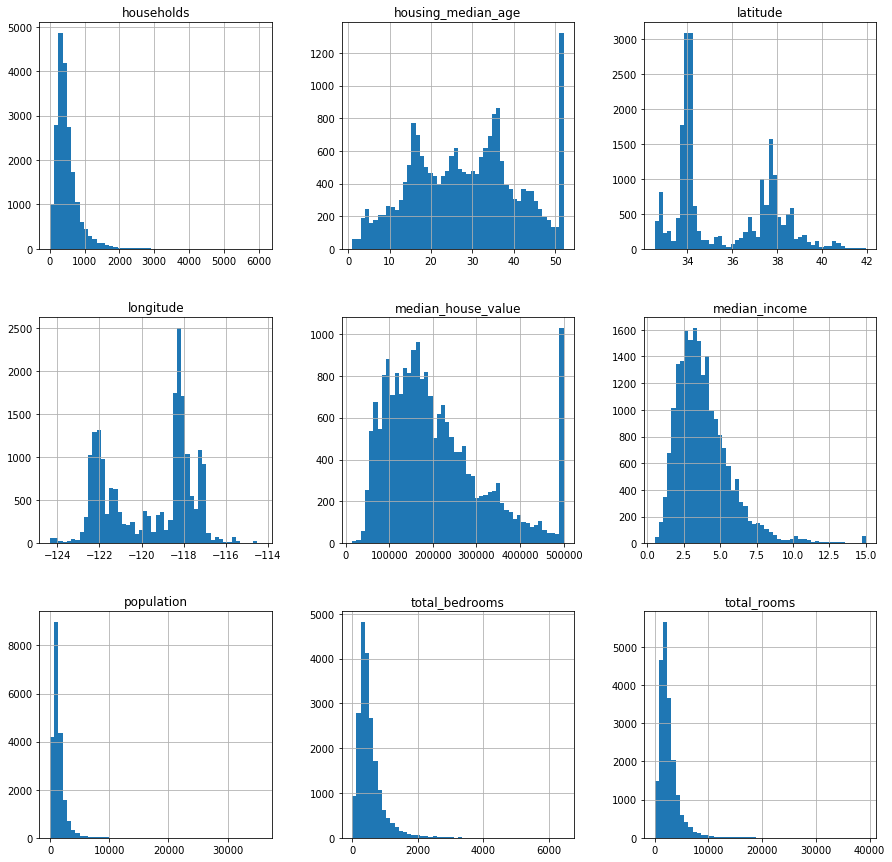

In [4]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

## Pre-process the data

In [5]:
#We observe that median income data is continuos, so we make it discrete
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


## Training the model

In [7]:
#We are using stratified sampling technique here since we derived a new attribute called income category
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

In [8]:
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
strat_train_set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set.drop(["income_cat"],axis=1,inplace=True)

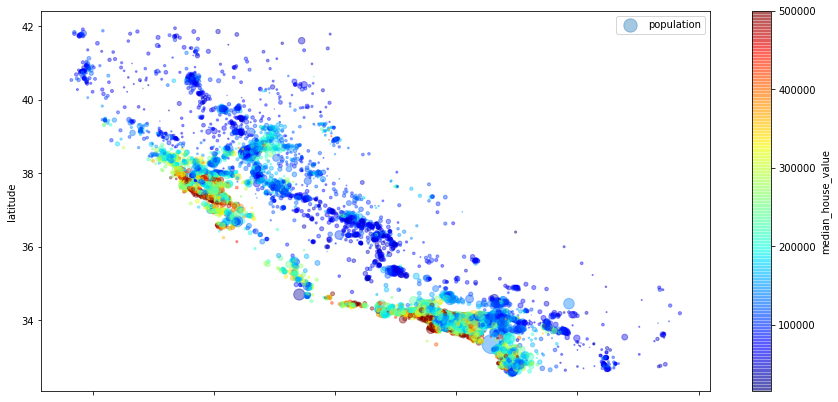

In [10]:
#We create a copy of our training data and visualize it using a scatter plot
housing = strat_train_set.copy()
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"),
            colorbar=True,
            figsize=(15,7))
plt.legend()

## Checking for Colinearity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E27413B248>,
      dtype=object)

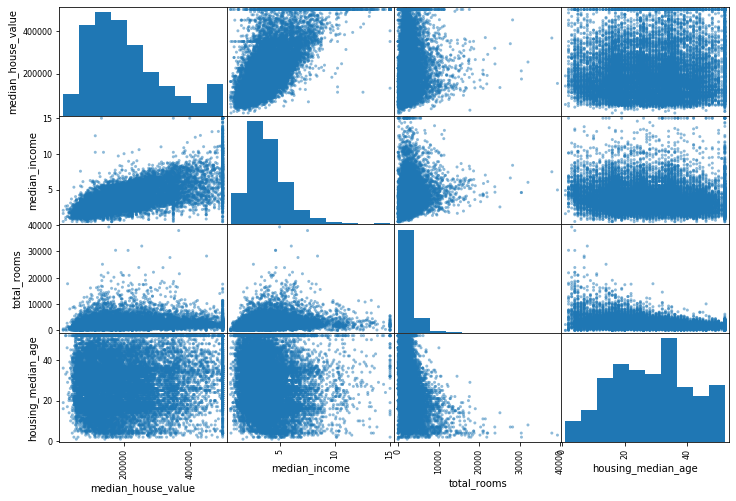

In [11]:
#We use scatter-matrix to plot every attribute that we think are important
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

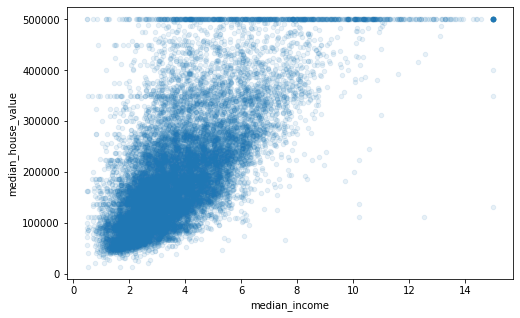

In [12]:
#We'll focus on the correlation between median house value and the median house income
housing.plot(kind='scatter',x='median_income',
            y='median_house_value',alpha=0.1,figsize=(8,5))

#This is good correlation
#We see a horizontal line at the top which marks the upper capping
#Some horizontal lines in the middle too

In [13]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN


In [14]:
#The above attributes are for whole regions
#So we find them for each household because we are calculating per house price
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedrooms_per_house']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_house,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


In [15]:
#Finding out the correlation of entire dataset and find out which is most related to median house value
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_house             0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_house         -0.259984
Name: median_house_value, dtype: float64

## Data Cleaning

In [16]:
#housing - this is the chunk we'll feed our model to learn
#housing_labels - this is our target price in our training dataset which our model should learn
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [17]:
#total_bedrooms has missing values so we set the missing value to median value using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num=housing.drop('ocean_proximity',axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Building Pipelines

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix=3,5,4,6

In [19]:
#this component gives us the flexibility to add extra attributes to our pipeline 
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    
    def fit(self, X,y=None):return self
    
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household,bedrooms_per_room]
        else: return np.c_[X,rooms_per_household,population_per_household]

In [20]:
#this component allows us to select entire or partial dataframe
#or in simpler words we can tell which attributes we want in our pipeline
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None): return self
    def transform(self,X):return X[self.attribute_names].values

In [21]:
#Label Binarizer converts text to integers,integers to one hot vectors(all 0's but only one 1)
class MyLabelBinarizer (TransformerMixin):
    def __init__(self,*args,**kwargs):
        self.encoder=LabelBinarizer(*args,**kwargs)
    def fit(self,x,y=0):
        self.encoder.fit(x)
        return self
    def transform(self,x,y=0):return self.encoder.transform(x)

In [22]:
#separating numerical and categorical attributes
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

In [24]:
#Adding components to numerical pipeline:
#1.DataFrameSelector - to choose the desired attributes
#2.SimpleImputer - to fill missing values with median
#3.CombinedAttributesAdder - Custom class to add new attributes to model
#4.Std Scaler - to bring all attributes to the same level

In [25]:
#numerical pipeline
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),
                        ('imputer',SimpleImputer(strategy="median")),
                        ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler()),
                        ])

In [26]:
#categorical pipeline
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),
                        ('label_binarizer',MyLabelBinarizer()),
                        ])

In [27]:
#full pipeline
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [28]:
#preparing entire dataset with pipeline
housing_prepared = full_pipeline.fit_transform(housing)

In [29]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Preparing model

### Comparing between 3 popular models


### 1. Linear Regression with K-fold cross validation

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

In [31]:
#we'll be using the negative mean-squared error
#cv=10 results an array of 10 scores
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error",cv=10)

In [32]:
#Since scores contains negative values we find the rmse like this
rmse_scores=np.sqrt(-scores)
#find root mean squared error, scores is an array of negative numbers

In [33]:
print("Mean:\t\t",rmse_scores.mean(),"\nStandard Deviation:",rmse_scores.std())

Mean:		 69386.21656804287 
Standard Deviation: 2752.555727010618


In [34]:
#a typical prediction error of 69,386+-2752 is not very satisfying. This is an example of model underfitting
#this means features do not provide enough information or the model is not powerful enough

### 2. Decision Tree Regressor with K-fold cross validation

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [36]:
#see the 10 scores
scores

array([-4.97403857e+09, -4.53052851e+09, -4.62789386e+09, -4.91642629e+09,
       -4.96767868e+09, -5.63994008e+09, -5.00693071e+09, -4.13632631e+09,
       -5.11135056e+09, -4.62328906e+09])

In [37]:
#find root mean squared error
rmse_scores = np.sqrt(-scores)

In [38]:
print("Mean:\t\t ",rmse_scores.mean(), "\nStandard Deviation:" ,rmse_scores.std())

Mean:		  69612.56471325169 
Standard Deviation: 2744.2845322318126


In [39]:
#We have error of 69237+-2986 which performs a little worse than linear regression model

### 3. Ensemble Learning - Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                     max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0, warm_start=False
                     )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [42]:
print("Mean:\t\t ",forest_rmse_scores.mean(),"\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  49201.35439552971 
Standard Deviation: 1841.5797992645505


In [43]:
#We have prediction error of 49200+-1995 which looks very promising and performs the best out of the three
#Building a model on top of other model is called Ensemble Learning

## Fine tune our model with Hyper parameters

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
             {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[ 2,3,4]},
             ]

In [45]:
# In the first row there are 3x4 = 12 combinations
# In the second row 2x3 = 6 combinations with bootstrap false
# So total 12+6 = 18 combinations

In [46]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [47]:
#Finding the best estimator
grid_search.best_estimator_
#The trailing underscore is for parameters that the model has learnt.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
# It shows max_features=8 and n_estimators=30
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                     max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0, warm_start=False
                     )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
#Visualising and comparing the model with and without fine tuning
cvres = grid_search.cv_results_
print("{}\t\t {}\n".format('Mean Score','Parameters'))
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x,y))

Mean Score		 Parameters

64576.36	 {'max_features': 2, 'n_estimators': 3}
56044.13	 {'max_features': 2, 'n_estimators': 10}
53077.63	 {'max_features': 2, 'n_estimators': 30}
60636.87	 {'max_features': 4, 'n_estimators': 3}
53404.79	 {'max_features': 4, 'n_estimators': 10}
50456.48	 {'max_features': 4, 'n_estimators': 30}
58419.56	 {'max_features': 6, 'n_estimators': 3}
51806.26	 {'max_features': 6, 'n_estimators': 10}
49702.67	 {'max_features': 6, 'n_estimators': 30}
58145.73	 {'max_features': 8, 'n_estimators': 3}
51156.73	 {'max_features': 8, 'n_estimators': 10}
49264.36	 {'max_features': 8, 'n_estimators': 30}
62194.34	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54513.58	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60680.17	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52888.29	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58999.92	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51588.60	 {'bootstrap': False, '

In [50]:
#The minimum value is 49,538 with max_features=6, n_estimators=30
#Without fine-tuning we had 49,200 so there is no improvement

## Evaluating model on the test set

In [51]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

In [52]:
#prediction
final_predictions = final_model.predict(X_test_prepared)

In [53]:
#find mean square error
final_mse = mean_squared_error(y_test, final_predictions)
#find root mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

47310.59440646111